## Analysis of a drugstore chain sales <a class="anchor" id="top"></a>


We are going to analyze a sample of data from the sales of a drugstore retail chain.

The data is extracted from a database with a few million rows. 
The data was aggregated on IdLocation and calendar months('YYYY-MM') by the 'Total_Sales', 'Units_Sold' and 'Net_Profit'.
I extracted only the products that met the top 10 criteria on either 'Total_Sales' or 'Net_Profit', for each product classification and for each of the 5 locations.

From the data we'll try to answer to the following questions:

1. [Which area is the best location for a drugstore?](#first)
2. [Which products have been sold the most considering quantity, sales and profit?](#second)
3. [What areas of products to focus for marketing campaign?](#third)


* <i>Comments are written below the graph</i>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# We import the data from csv file:
df = pd.read_csv('think capstone1_slim.csv' ,encoding ='latin1')


In [4]:
# Get a feel for the data:
df.head()

,YYYY_MM,IdProduct,Product_Name,Manufacturer_Name,Product Classification,IdLocation,Drugstore_Name,Total_Sales,No_of_transactions,No_of_medical_prescriptions,Units_Sold,Net_Profit,row_num_sales,row_num_profit
0,2015-1,20177,Nut Seringa Ject 10 Ml Cu Ac,MINUT,_DispozitivMedicalMultiplu,3,Stad,45.73,15,0,86.0,18.07,2,3
1,2015-1,2130,Panthen Unguent 50 Mg /G X 100 G,BAYER SCHERING,Cosmetice,3,Stad,265.55,4,0,5.0,46.66,1,1
2,2015-1,18,Oderma Abc Derm Gel Spumant X 200 Ml,BIODERMA,Cosmetice,3,Stad,37.42,1,0,1.0,9.45,14,9
3,2015-1,20697,Ltene Tratament Pt Unghii,FOLTENE,Cosmetice,3,Stad,48.90,1,0,1.0,4.38,8,33
4,2015-1,25030,Nsiprod Tensiometru Pentru Brat,PANSIPROD,Dispozitive Medicale,3,Stad,408.16,2,0,2.0,96.13,1,2


In [5]:
# What kind of data is in the dataframe?
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1686 entries, 0 to 1685
Data columns (total 14 columns):
YYYY_MM                        1686 non-null object
IdProduct                      1686 non-null int64
Product_Name                   1686 non-null object
Manufacturer_Name              1686 non-null object
Product Classification         1686 non-null object
IdLocation                     1686 non-null int64
Drugstore_Name                 1686 non-null object
Total_Sales                    1686 non-null float64
No_of_transactions             1686 non-null int64
No_of_medical_prescriptions    1686 non-null int64
Units_Sold                     1686 non-null float64
Net_Profit                     1686 non-null float64
row_num_sales                  1686 non-null int64
row_num_profit                 1686 non-null int64
dtypes: float64(3), int64(6), object(5)
memory usage: 184.5+ KB
None


In [6]:
# Generate a list of unique elements along with how often they occur.
(values, counts) = np.unique(df['IdLocation'], return_counts=True)
print('Values:',values,'\n No of Lines:',counts)

Values: [   3    4   18 1001 1002] 
 No of Lines: [318 320 360 359 329]


In [7]:
df['Product Classification'].value_counts()

RX                            211
Suplimente                    207
OTC                           205
Cosmetice                     204
Parafarm.                     200
Dispozitive Medicale          190
PROPRII                       158
_DispozitivMedicalMultiplu    158
Homeopate                      79
0 Consumabile                  58
RX - 120                       15
0 Obiecte de inventar           1
Name: Product Classification, dtype: int64

In [8]:
df.describe()

,IdProduct,IdLocation,Total_Sales,No_of_transactions,No_of_medical_prescriptions,Units_Sold,Net_Profit,row_num_sales,row_num_profit
count,1686.000000,1686.000000,1686.000000,1686.000000,1686.000000,1686.000000,1686.000000,1686.000000,1686.000000
mean,17536.994662,413.838078,755.249087,45.064650,5.153025,94.325463,177.627141,8.174377,17.077106
std,10105.808406,488.085122,1324.470312,186.227578,20.279157,671.290253,293.222479,7.835199,52.260305
min,13.000000,3.000000,0.080000,0.000000,0.000000,0.100000,-407.790000,1.000000,1.000000
25%,8709.000000,4.000000,95.887500,3.000000,0.000000,3.000000,18.240000,3.000000,3.000000
50%,20178.000000,18.000000,278.640000,11.000000,0.000000,11.000000,65.215000,6.500000,6.500000
75%,25873.750000,1001.000000,808.340000,33.000000,0.000000,40.000000,224.167500,10.000000,10.000000
max,31609.000000,1002.000000,20388.060000,3346.000000,196.000000,15500.000000,2614.640000,69.000000,845.000000


## 1. Which area is the best location for a drugstore?<a class="anchor" id="first"></a>

The criteria to pick the area for a good location can be:
- it brings the most profit;
- it brings the biggest sales: maybe there are a lot of customers going in;
- there are a lot customers passing by but the sales team is lacking selling skills.

In [9]:
# Overview of the columns that have summable values:
df.groupby('IdLocation')['Total_Sales','No_of_transactions','No_of_medical_prescriptions','Units_Sold','Net_Profit'].sum()



,Total_Sales,No_of_transactions,No_of_medical_prescriptions,Units_Sold,Net_Profit
IdLocation,,,,,
3,168764.91,12635,1057,25232.64,35656.40
4,244735.70,23494,1080,31090.06,60347.67
18,237503.71,9070,1925,12288.91,55693.37
1001,308659.38,16388,1375,30830.56,63431.54
1002,313686.26,14392,3251,59590.56,84350.38


Total_Sales >> By the number of sales there is almost a tie between location 1001 and 1002.

No_of_transactions >> Looking at number of transactions, which can be approximated with the number of clients (we ignore the fact that some of the clients may come in more than once in the anlyzed period of time(~3 months)), we can say that idlocation 4 has the best traffic.

No_of_medical_prescriptions >> A higher number means that there are a lot of patients with chronic disease that are 'obliged' to seek a pharmacy for their drugs. This patients can be convinced to buy more OTC or cosmetics next to their prescription which may bring more profit. IdLocation 1002 leads by far.

Units_Sold >> The more units are sold the more chance to sell a product that has a higher margin. Advantage IdLocation 1002 by a long distance (almost double the 2nd place).

Net_Profit >> the core indicator which directly shows wich location is the best: IdLocation 1002.
However we discover that IdLocation 4 and 1001 are very close to each other, number 4 recovers through the higher number of transactions(clients). Number 4 has to work more the same profit than 1001 which sells more expensive products to thick-wallet customers.


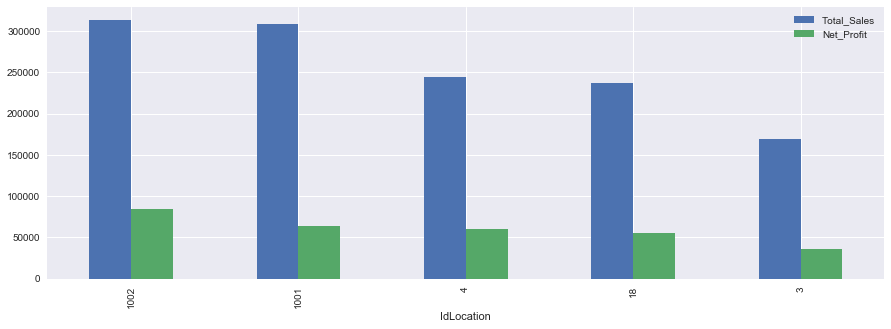

In [81]:
c=df.groupby(['IdLocation'])['Total_Sales','Net_Profit'].sum()
c.sort_values(by='Total_Sales',ascending=False).plot( kind = 'bar' ,figsize = (15,5))
plt.show()

### This graph shows the Total Sales for each location in descending order. 
By ploting the Net_Profit column we can see if there are any discrepancies in respect of Total_Sales, i.e. maybe there is a location with a lower value in Total_Sales but with the highest value of Net_Profit.

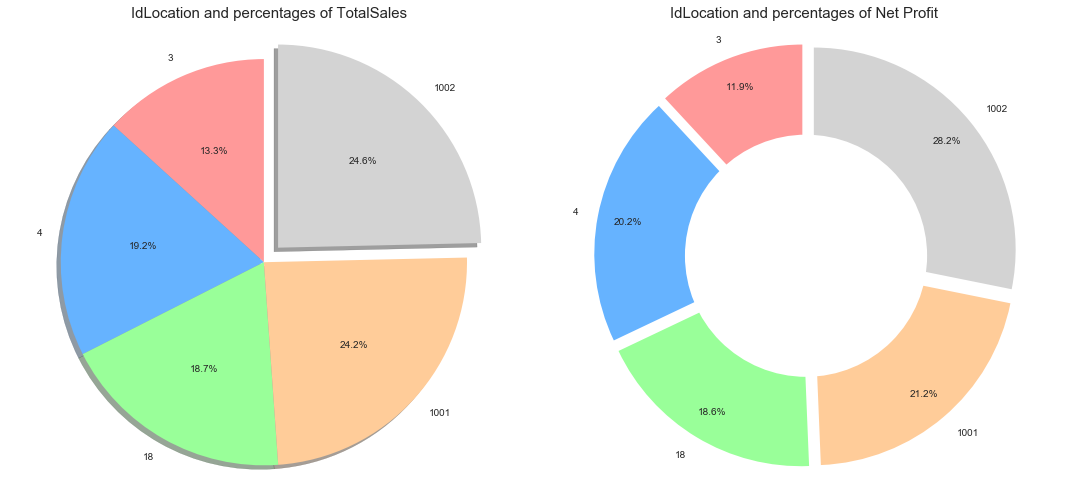

In [11]:

fig1,(ax1 , ax2) = plt.subplots(1,2)

#colors
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#d3d3d3']
explode =  (0, 0, 0, 0,0.1) 

ax1.pie( df.groupby(['IdLocation'])['Total_Sales'].sum(), explode=explode, labels=np.unique(df.IdLocation)
        , colors = colors, autopct='%1.1f%%',  shadow=True, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle

ax1.axis('equal')  
ax1.set_title('IdLocation and percentages of TotalSales',fontsize= 15)


#----------------------
#colors
colors2 = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#d3d3d3']
#explsion
explode2 = (0.05,0.05,0.05,0.05,0.05)

ax2.pie( df.groupby(['IdLocation'])['Net_Profit'].sum(), colors = colors2, labels=np.unique(df.IdLocation)
         , autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode2 )

#draw circle
centre_circle = plt.Circle((0,0),0.60,fc='white')
fig = plt.gcf()
fig.set_size_inches(15,7)
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax2.axis('equal')  
ax2.set_title('IdLocation and percentages of Net Profit',fontsize= 15)

plt.tight_layout()

plt.show()

### This plot shows the percentages among locations thus we are able to better compare them.

We observe that even if the IdLocation=1002 has approximately the same value of Total_Sales with idlocation=1001, the value of Net_Profit is quite different, 1002 being better positioned(28.2% vs. 21.2%).

We can say that location 1002 has a good sales team that is more focused on promoting the profitable products.

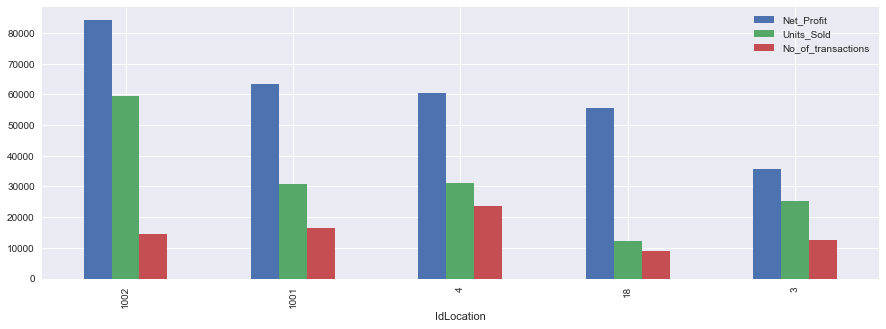

            Net_Profit  Units_Sold  No_of_transactions
IdLocation                                            
1002          84350.38    59590.56               14392
1001          63431.54    30830.56               16388
4             60347.67    31090.06               23494
18            55693.37    12288.91                9070
3             35656.40    25232.64               12635


In [106]:
#Remove some products that are given for free at each trade. They are extreme outliers with no effect.
h=df[(df['Product_Name'] != 'Nga Hartie Mica')| (df['Product_Name'] !='Nga Hartie Mare')|(df['Product_Name'] !='Cosa 1 Ecotaxa Mica')]

h=h.groupby(['IdLocation'])['Net_Profit','Units_Sold','No_of_transactions'].sum() 

h=h.sort_values(by='Net_Profit',ascending=False)

h.plot( kind = 'bar' ,figsize = (15,5))
plt.show()

print(h.head(15))

### This graph shows an interesting fact about how efficient the sales team in 1002 is vs locations 1001 and 4, in respect to the Number_of_transactions (roughly ~= Number of clients). 
> 1002 has fewer clients than 1001 or 4 but the Net_Profit is much higher.

In the same time, the team in 1002 manages to sell more products(Units_Sold) per client than the next to competitors, 1001 and 4.

### Two-Sample T-Test

This test measures the size of the differences of the means relative to the variation in our sample data. The result is valid for the whole population!

We want to compare how simmilar is the Net_Profit column between two top locations.

Do the location perform equaly? (Null Hypothesis)

The greater the magnitude of the t-test, the greater the evidence that there is a <b><u>significant</u></b> difference, so we reject the Null Hypothesis.

We'll be using theUsusally we set the pvalue to be less than a cut-off point. We may chose this point to be 5%.

pvalue is the probability that your sample data occured by chance, and we can reject the null if the pvalue is less than the cut-off point.

In [191]:
import scipy.stats as stats
from scipy.stats import ttest_ind

s1001 = df['Net_Profit'][df['IdLocation'] == 1001]
s1002 = df['Net_Profit'][df['IdLocation'] == 1002]

print(ttest_ind(s1001, s1002, equal_var=False))



Ttest_indResult(statistic=-2.8817790940333876, pvalue=0.004111519556636165)


pvalue = 4.1% < 5%

### We reject the null hypothesis and accept that data is significant different for the whole population.


In [192]:
s3 = df['Net_Profit'][df['IdLocation'] == 3]
s1002 = df['Net_Profit'][df['IdLocation'] == 1002]

print(ttest_ind(s3, s1002, equal_var=False))

Ttest_indResult(statistic=-5.67364701488719, pvalue=2.6007917220593237e-08)


* The way of doing things at location 1002 can and should be copied, if possible, to the 1001 and 4 locations.

For now, 1002 is the best location in converting to profit what it sells to the pacient. However there are more questions to be answered in order to discover if there aren't any other hidden advantages that make the 1002's clients easier to sell to.

[Go back to top index](#top)

## 2. Which products have been sold the most considering quantity, sales and profit? <a class="anchor" id="second"></a>


In [13]:
df.groupby(['Product_Name'])['Net_Profit'].sum().nlargest(5)



Product_Name
O-Dis L-Arginina 500 Mg X 50 Cps.     21577.01
Eprazol Atb 20 Mg X 20 Cps. Gastr.    16787.49
Bilet 5 Mg X 28 Cpr.                   9990.44
Rtensif Sr 1.5 Mg X 30 Cpr.            8338.17
O-Dis Digmax 400 Mg X 50 Cps.          8139.40
Name: Net_Profit, dtype: float64

                           Product_Name  Net_Profit
289   O-Dis L-Arginina 500 Mg X 50 Cps.    21577.01
80   Eprazol Atb 20 Mg X 20 Cps. Gastr.    16787.49
29                 Bilet 5 Mg X 28 Cpr.     9990.44
419         Rtensif Sr 1.5 Mg X 30 Cpr.     8338.17
287       O-Dis Digmax 400 Mg X 50 Cps.     8139.40


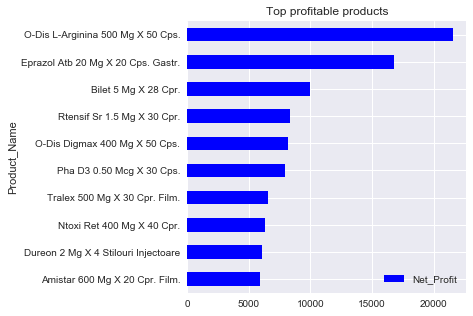

In [14]:
a = df.groupby(['Product_Name'])['Net_Profit'].sum().reset_index()
a = a.sort_values(by=['Net_Profit'],ascending=False)
print(a.head())

a.head(10).plot(x='Product_Name', y ='Net_Profit' , kind='barh', figsize=[5, 5]
                ,title="Top profitable products"
               ,color='b'
               )
plt.gca().invert_yaxis()
plt.show()

> The bar chart from above shows which are the most profitable 10 products sold.

    Manufacturer_Name  Net_Profit
22            BIO-DIS    52567.66
73       LAB. SERVIER    30225.39
10        ANTIBIOTICE    20327.19
19      BERLIN CHEMIE    17227.96
116   TERAPIA RANBAXY    14453.64


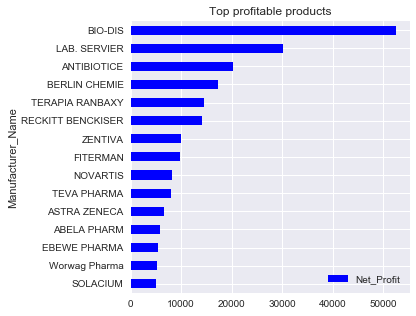

In [15]:
a = df.groupby(['Manufacturer_Name'])['Net_Profit'].sum().reset_index()
a = a.sort_values(by=['Net_Profit'],ascending=False)

print(a.head())

a.head(15).plot(x='Manufacturer_Name', y ='Net_Profit' , kind='barh'
               , figsize=[5, 5],title="Top profitable products"
              , color = 'b'
              )
plt.gca().invert_yaxis()
plt.show()

> Here are the top 15 manufacturers that bring the most profit.

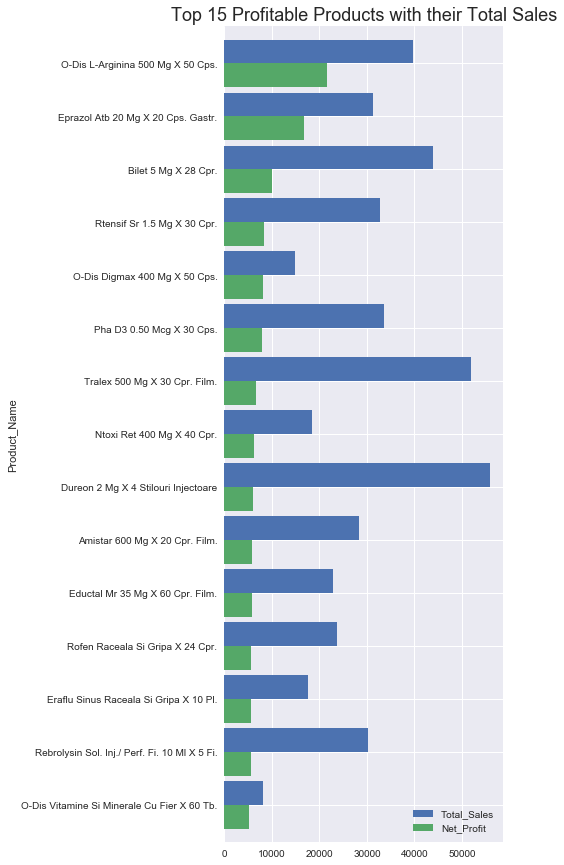

In [82]:
#fig1,(b , c) = plt.subplots(1,2)
b = df.groupby(['Product_Name'],sort = False)['Total_Sales','Net_Profit'].sum()
b.sort_values(by='Net_Profit',ascending=False).head(15).plot( kind = 'barh' ,figsize = (5,15) , width=0.9)
plt.gca().invert_yaxis()
plt.title('Top 15 Profitable Products with their Total Sales', fontsize=18)

plt.show()

### Here we can see that there are products that have a higher price (total sales) but lower profit: 'Dureon 2' or 'Tralex 500'.

A first ideea is to try to concentrate on selling the top most profitable products, but it is more to find out why such products as 'Dureon 2' or 'Tralex 500' are still being bought by customers.

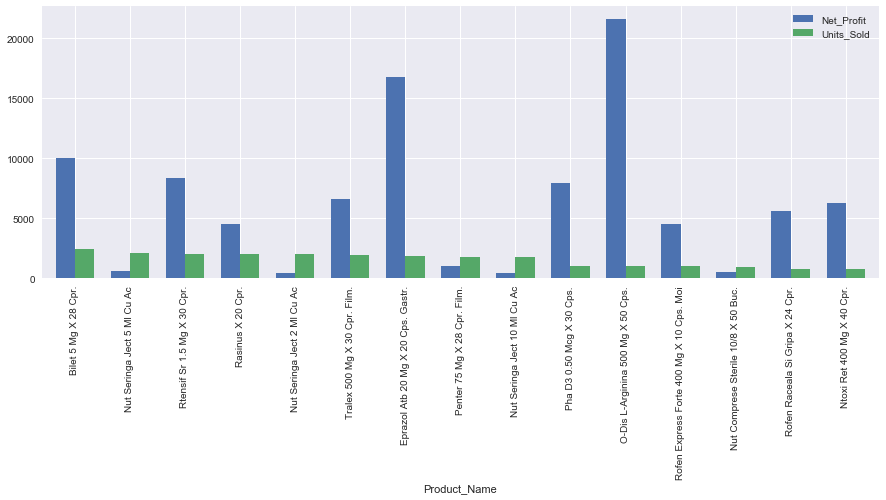

In [17]:
c=df.groupby(['Product_Name'])['Net_Profit','Units_Sold'].sum() #No_of_transactions

c=c.sort_values(by='Units_Sold',ascending=False)
c=c.drop(['Nga Hartie Mica','Nga Hartie Mare','Cosa 1 Ecotaxa Mica'])

c.head(15).plot( kind = 'bar' ,figsize = (15,5) , width=0.7)
#plt.gca().invert_yaxis()
plt.show()


### The second graph shows which are the products with the highest units sold(descending order) side by side with Net_Profit. 

Is there a relation between volume and profit? It seems not: there are products with lower units sold but with higher profit: 'O-Dis L-Arginina 500' or 'Eprazol Atb 20'.

-------------

In [83]:
c=df.groupby(['Product_Name'])['Net_Profit','Units_Sold','No_of_transactions'].sum() #No_of_transactions

c=c.sort_values(by='Units_Sold',ascending=False)
c=c.drop(['Nga Hartie Mica','Nga Hartie Mare','Cosa 1 Ecotaxa Mica'])

print(c.head(5))
#plt.figure(figsize=(20, 5))
#plt.scatter('Units_Sold','No_of_transactions' , data = c.head(100) , marker='o' )
#plt.scatter('No_of_transactions','Net_Profit' , data = c.head(100) , marker='x' )
#plt.title('Relation between Units Sold and Number of Clients' , fontsize=22)
#plt.xlabel('Units Sold' , fontsize = 'xx-large')
#plt.ylabel('Number of Clients' , fontsize = 'xx-large')
# 
#plt.show()
#

                             Net_Profit  Units_Sold  No_of_transactions
Product_Name                                                           
Bilet 5 Mg X 28 Cpr.            9990.44     2419.85                1944
Nut Seringa Ject 5 Ml Cu Ac      631.25     2105.00                 377
Rtensif Sr 1.5 Mg X 30 Cpr.     8338.17     2033.97                1638
Rasinus X 20 Cpr.               4494.21     1998.85                2290
Nut Seringa Ject 2 Ml Cu Ac      465.79     1992.00                 384


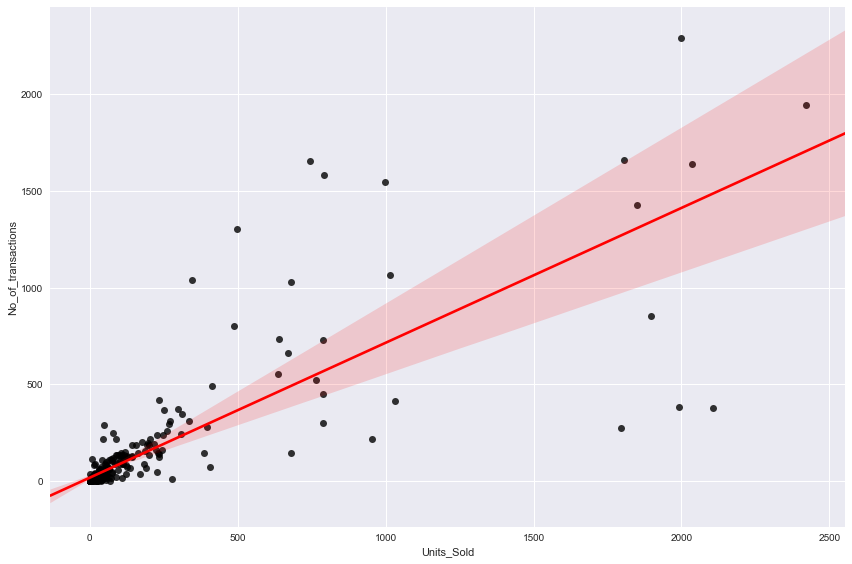

In [76]:
import seaborn as sns
from matplotlib import rcParams

ax=sns.lmplot(x='Units_Sold',y='No_of_transactions',data=c,fit_reg=True
          ,scatter_kws={"color": "black"}, line_kws={"color": "red"}
         #,scatter_kws={"s": 300} # change the size of the markers
            , size=8,aspect=1.5
              
          )
plt.show()

The scatter plot wants to reveal if there is a relation between Units Sold and Number of clients (transactions).

At lower values, where most of the data resides,there may be a direct relation between them, meaning that the more clients come in, the more products are sold.

1. If we have a higher number in Clients than in number of Units, it means that Clients are buying 'fractions' of the product (the product has caspsules).
2. If we have a higher number in Units than in clients, it means that a client buys more from the product
> We should try to have more of the second situation.

We should add the Net_Profit column to draw a more precise conclusion.

-----------

                                    Net_Profit  Units_Sold  No_of_transactions
Product_Name                                                                  
O-Dis L-Arginina 500 Mg X 50 Cps.     21577.01     1016.74                1065
Eprazol Atb 20 Mg X 20 Cps. Gastr.    16787.49     1848.40                1427
Bilet 5 Mg X 28 Cpr.                   9990.44     2419.85                1944
Rtensif Sr 1.5 Mg X 30 Cpr.            8338.17     2033.97                1638
O-Dis Digmax 400 Mg X 50 Cps.          8139.40      347.04                1040


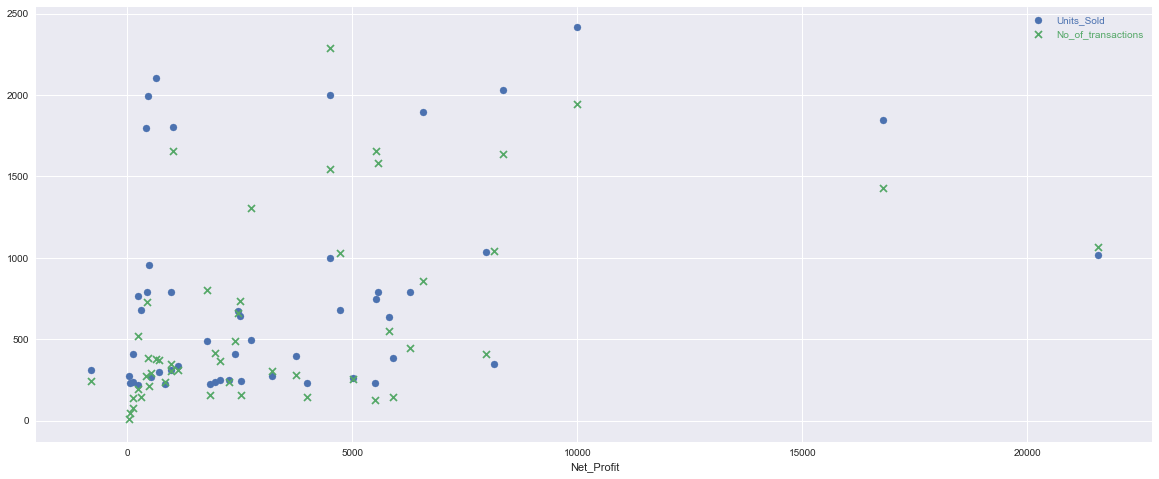

In [71]:
d=df.groupby(['Product_Name'])['Net_Profit','Units_Sold','No_of_transactions'].sum() #No_of_transactions

d=d.sort_values(by='Net_Profit',ascending=False)
d=d.drop(['Nga Hartie Mica','Nga Hartie Mare','Cosa 1 Ecotaxa Mica'])

print(d.head(5))

fig, ax = plt.subplots(figsize=(20,8))

#fig = plt.figure(figsize=(10,5))
#ax1=fig.add_subplot(121)
#ax2=fig.add_subplot(122)
#plt.subplots_adjust(wspace = 0.33 )

ax.scatter('Net_Profit','Units_Sold' , data = c.head(50) , marker='o' )
ax.scatter('Net_Profit' ,'No_of_transactions', data = c.head(50) , marker='x' )

leg = ax.legend()

for h, t in zip(leg.legendHandles, leg.get_texts()):
    t.set_color(h.get_facecolor()[0])
plt.xlabel('Net_Profit')
plt.show()

This scatter plot wants to reveal if there is a relation between Units Sold or Number of clients (transactions) and Net_Profit.

The data is too spread out

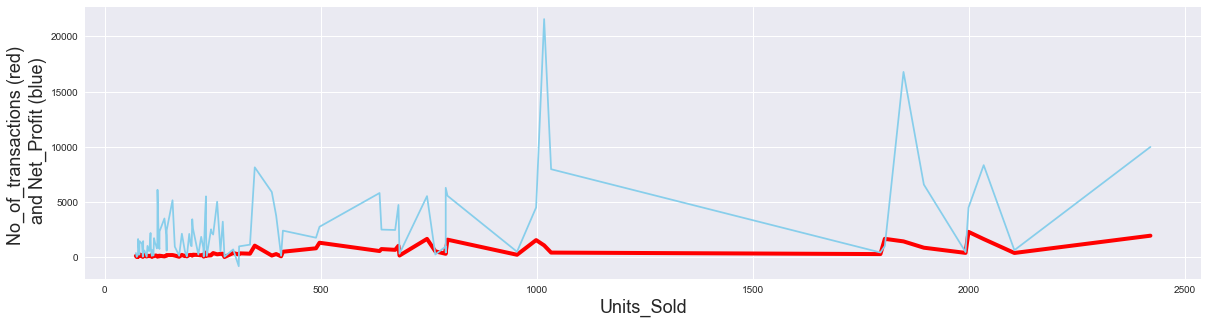

In [90]:
e=df.groupby(['Product_Name'])['Net_Profit','Units_Sold','No_of_transactions'].sum() #No_of_transactions

e=e.sort_values(by='Units_Sold',ascending=False)
e=e.drop(['Nga Hartie Mica','Nga Hartie Mare','Cosa 1 Ecotaxa Mica'])

#print(c.head(15))

plt.figure(figsize=(20, 5))
plt.plot('Units_Sold','No_of_transactions' , data = c.head(100), color='red'  ,linewidth=4 )
plt.plot('Units_Sold','Net_Profit'  , data = c.head(100) , color='skyblue'  )
plt.xlabel('Units_Sold', fontsize=18)
plt.ylabel('No_of_transactions (red) \n and Net_Profit (blue)', fontsize=18)

plt.show()

It seems that there is no direct ling between units sold and the other 2 indicators. There are spikes from time to time, but not a general trend.

> The company should focus on the top selling products in terms of profit and to promote those that are lower in selling fiures but with a higher Profit/Sales ratio.

[Go back to top index](#top)

--------

## 3. What areas of products to focus for marketing campaign?<a class="anchor" id="third"></a>

   Product Classification  Net_Profit
8                      RX     501.740
5                     OTC     246.630
6                 PROPRII     161.045
10             Suplimente     138.150
3    Dispozitive Medicale      49.405
7               Parafarm.      44.555


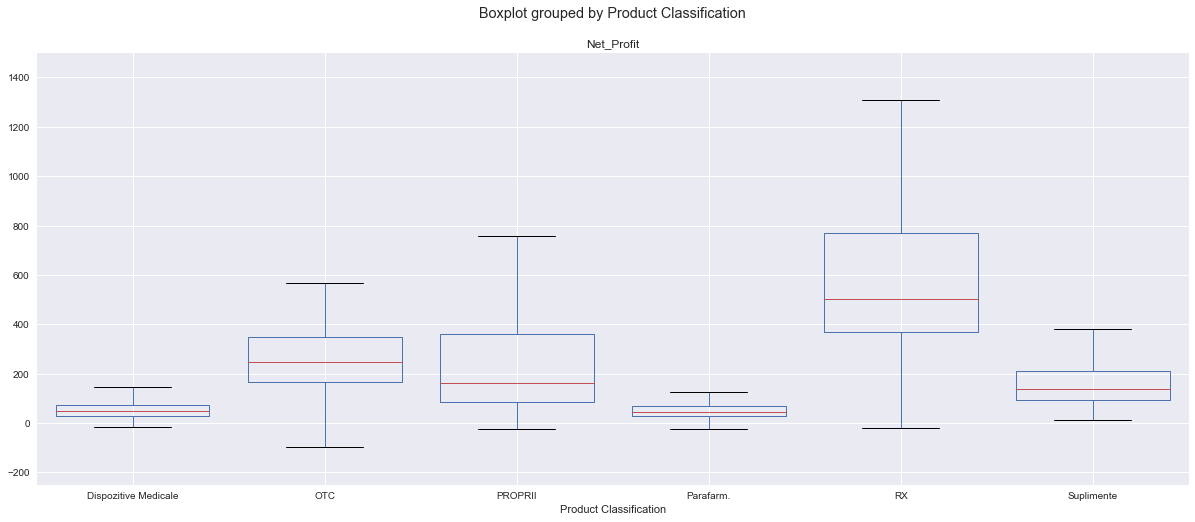

In [190]:
median_class_profit = df[['Product Classification','Net_Profit']].groupby(['Product Classification'])['Net_Profit'].median().reset_index().sort_values('Net_Profit',ascending=False).head(6)
lst = median_class_profit['Product Classification'].tolist()
print(median_class_profit)

#df2=df[df.columns.intersection(lst)]
#df2=df[np.intersect1d(df.columns,lst)]
df2=df[df['Product Classification'].isin(lst)]

df2.boxplot(column="Net_Profit" , by = 'Product Classification' , figsize=(20,8),widths=(0.8))
#plt.ylim(-100)
axes = plt.gca()
axes.set_ylim(-250,1500)
plt.show()

Here we see how the data in Net_Profit is distributed among Product_Classification

                           No_of_transactions                                
IdLocation                               3       4       18      1001    1002
Product Classification                                                       
Cosmetice                                93.0   117.0    91.0   116.0   134.0
Dispozitive Medicale                    192.0   392.0   178.0   271.0   297.0
Homeopate                                 1.0     3.0    46.0    33.0    10.0
OTC                                    2514.0  4233.0  2550.0  3577.0  3621.0
PROPRII                                 465.0   626.0   997.0   542.0   984.0
Parafarm.                               430.0   797.0   438.0   694.0   764.0
RX                                     1336.0  1483.0  2320.0  1773.0  3848.0
RX - 120                                  7.0    17.0    30.0    14.0    13.0
Suplimente                              769.0  1093.0   846.0  1110.0  1144.0
_DispozitivMedicalMultiplu              186.0   311.0   246.0   

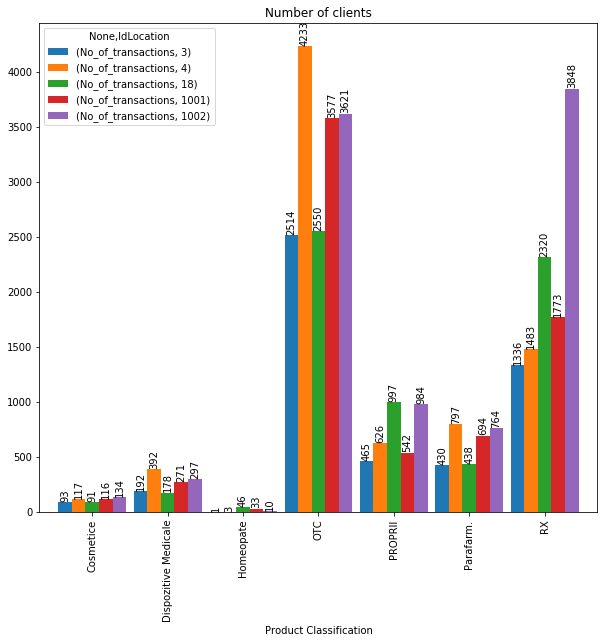

In [747]:
b = df.groupby(['Product Classification','IdLocation'])['No_of_transactions'].sum().reset_index()
#b = b.sort_values(by=['Product Classification','No_of_transactions'],ascending=False)

b = b.pivot( index='Product Classification' , columns= 'IdLocation')
#b.columns = b.columns.get_level_values(1)
b = b.drop(['0 Consumabile','0 Obiecte de inventar'])
print(b)
col_list=b.columns.tolist()
col_id=[]
for item in col_list:
    col_id.append(item[1])

#plt.figure(figsize=(12, 8))
ax=b.head(7).plot( kind='bar'
               , figsize=[10, 9]
               , title="Number of clients"
              #, color = 'b'
               , width=0.9
             )
    
# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())    

rects = ax.patches

# Make some labels.
labels = ["%d" % i for i in totals]
#print(labels)
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 5, label
            , ha='center', va='bottom'
            ,rotation = 90
           )

plt.show()

We take a look first at the number of clients per product classification and we see that OTC and RX are the most tradeable groups.

In [763]:
df.groupby(['Product Classification'])['Net_Profit'].sum()

Product Classification
0 Consumabile                   1375.05
0 Obiecte de inventar             -2.75
Cosmetice                       3195.96
Dispozitive Medicale           10973.16
Homeopate                        504.48
OTC                            55431.14
PROPRII                        52567.66
Parafarm.                       9957.36
RX                            129235.93
RX - 120                          84.46
Suplimente                     33842.46
_DispozitivMedicalMultiplu      2314.45
Name: Net_Profit, dtype: float64

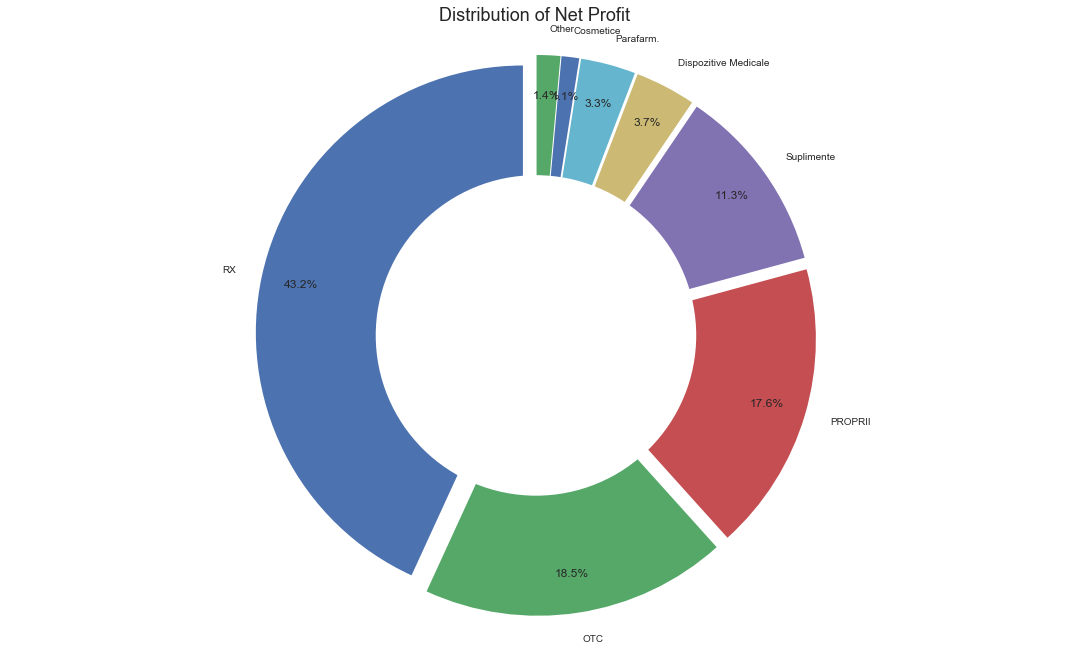

In [103]:


c = df.groupby(['Product Classification'])['Net_Profit'].sum().reset_index()
c = c.sort_values(by=['Net_Profit'],ascending=False)


other = c[7:].sum()
c = c[:7]
c.loc[11]=other
c.iloc[7,c.columns.get_loc('Product Classification')] = 'Other'

#colors
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#d3d3d3']
#explsion
explode = (0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05)


fig1,ax1 = plt.subplots()
ax1.pie( c['Net_Profit'] #c.groupby(['Product Classification'])['Net_Profit'].sum()
        #, colors = colors
        
        , labels=c['Product Classification']
        , autopct='%1.1f%%', startangle=90, pctdistance=0.85
        , explode = explode
        #, fontsize=10
       )
#draw circle
centre_circle = plt.Circle((0,0),0.60,fc='white')
fig = plt.gcf()
fig.set_size_inches(15,9)
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
#plt.title('IdLocation and percentages of NetProfit')
plt.tight_layout()
plt.title('Distribution of Net Profit' , fontsize=18)
plt.show()

Here we see that the biggest profit is brought by the RX classification, followed by OTC with 18.5%.

----

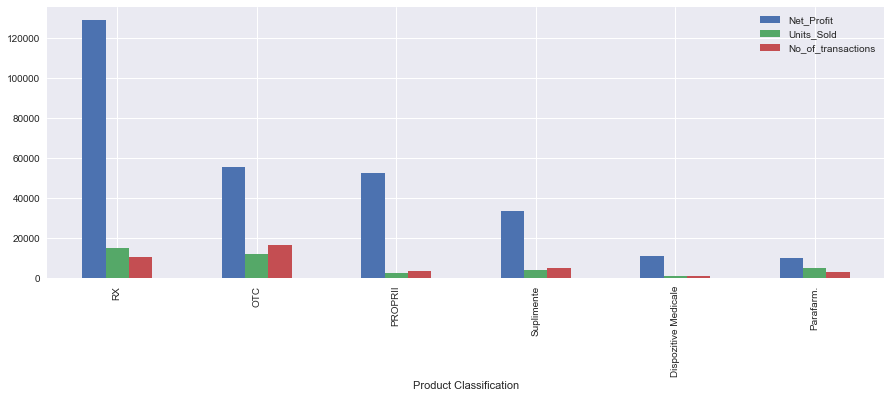

                        Net_Profit  Units_Sold  No_of_transactions
Product Classification                                            
RX                       129235.93    15225.08               10760
OTC                       55431.14    12135.28               16495
PROPRII                   52567.66     2725.78                3614
Suplimente                33842.46     4047.91                4962
Dispozitive Medicale      10973.16      976.07                1330
Parafarm.                  9957.36     5084.31                3123


In [112]:
#Remove some products that are given for free at each trade. They are extreme outliers with no effect.
j=df[(df['Product_Name'] != 'Nga Hartie Mica')| (df['Product_Name'] !='Nga Hartie Mare')|(df['Product_Name'] !='Cosa 1 Ecotaxa Mica')]
j=j.groupby(['Product Classification'])['Net_Profit','Units_Sold','No_of_transactions'].sum()

j=j.sort_values(by='Net_Profit',ascending=False).head(6)

j.plot( kind = 'bar' ,figsize = (15,5))
plt.show()
print(j)


### What can be said about the three indicators?

Combining the previous piechart and this one, we can say that there is approximately the same effort to sell RX and OTC (Units_Sold), but the profits are double for the RX classification.

OTC has the advantage of a higher number of clients, but the effect is not seen in the profit column.

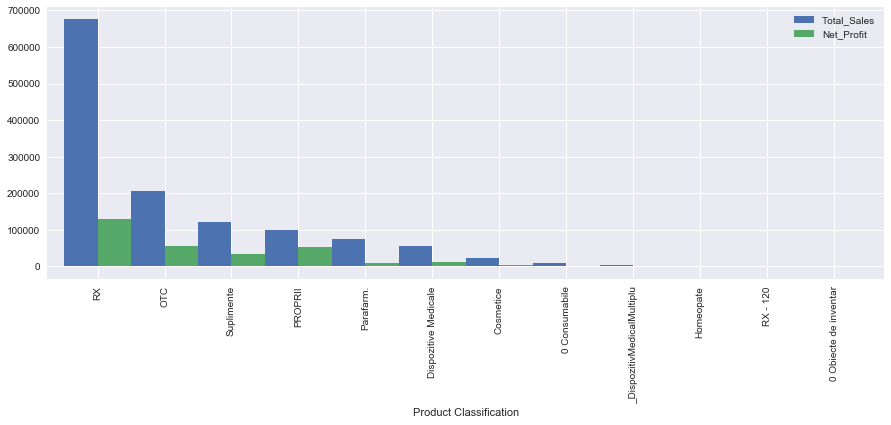

In [115]:
b = df.groupby(['Product Classification'],sort = False)['Total_Sales','Net_Profit'].sum()
b.sort_values(by='Total_Sales',ascending=False).plot( kind = 'bar' ,figsize = (15,5) , width=1)
plt.show()

> When we look at this two indicators, we can say that RX are more expensive products which can be harder to sell.

### OTC and Suplements have a higher profit/sales ratio. Also this group benefits from a higher number of customers and could grow faster, so Marketing should focus here.


[Go back to top index](#top)